# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = (btc_data['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = (eth_data['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} USD")

The current value of your 1.2 BTC is $81058.80 USD
The current value of your 5.3 ETH is $25359.86 USD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
#Assume the following amount of shares in stocks and bonds: `50` SPY (stocks) and `200` AGG (bonds).
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
quandl_api_key = os.getenv("QUANDL_API_KEY")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [8]:
# Format current date as ISO format
start_day = pd.Timestamp("27-10-2021", tz = "Australia/Sydney").isoformat()
end_day = pd.Timestamp("27-10-2021", tz = "Australia/Sydney").isoformat()
today = pd.Timestamp("27-10-2021", tz = "Australia/Sydney").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
weights = [0.4,0.6]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stocks = alpaca.get_barset(symbols = tickers, timeframe = "1D").df

# Preview DataFrame
stocks.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966  416.80   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846  420.85   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [9]:
# Pick AGG and SPY close prices
agg_close_prices = stocks.iloc[:,3]
spy_close_prices = stocks.iloc[:,8]
#taking the current close price
agg_close_price = agg_close_prices.iloc[-1]
spy_close_price = spy_close_prices.iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.33
Current SPY closing price: $467.38


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23369.00
The current value of your 200 AGG shares is $23066.00


### Savings Health Analysis

In this section, you will assess the financial health of the credit union's members.

1. Create a variable called `monthly_income` and set its value to `12000`.

2. To analyze savings health, create a DataFrame called `df_savings` with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

    **Hint:** The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values: 
    
    ![df_savings](Images/df_savings.png)

3. Use the `df_savings` DataFrame to plot a pie chart to visualize the composition of personal savings.

4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_share_value = my_spy_value + my_agg_value
total_crypto_value = my_btc_value + my_eth_value
data = {'amount':[total_share_value, total_crypto_value]}
df_savings = pd.DataFrame(data, index = ['shares','crypto'])
# Display savings DataFrame
display(df_savings)

,amount
shares,46435.000
crypto,106418.664


<AxesSubplot:title={'center':'% of Assets (Shares/Crypto)'}, ylabel='amount'>

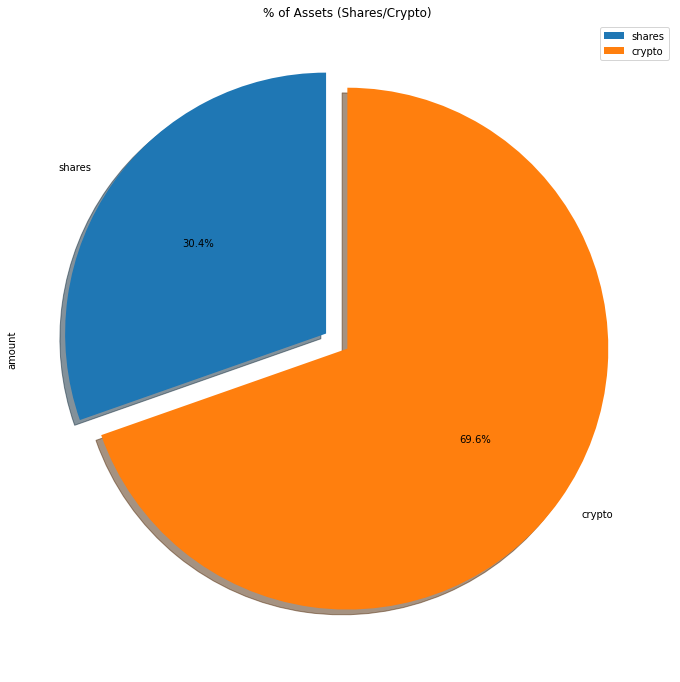

In [12]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount', title = '% of Assets (Shares/Crypto)', figsize = (12,12), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = (0.1, 0))

4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_share_value + total_crypto_value

# Validate saving health
def emergency_fund_calculator (x):
    if x > emergency_fund:
        print ("You have enough savings in your emergency fund!")
    elif x == emergency_fund:
        print ("You have reached your emergency fund goal.")
    else:
        print ("You are short from your emergency fund goal by", (emergency_fund - total_savings))

In [14]:
emergency_fund_calculator(total_savings)

You have enough savings in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(symbols = tickers, timeframe = "1D").df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966  416.80   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846  420.85   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_PORTFOLIO = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 30,
)

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_PORTFOLIO.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996547,1.000110,1.001181,1.003208,1.000784,1.001716,1.001822,1.001223,1.004650,1.002783,...,0.993180,1.004856,1.000615,1.003810,1.000337,1.001309,1.006359,0.994544,0.997168,1.003478
2,0.998497,1.002203,1.002140,0.996691,1.000648,0.999693,1.001821,1.004658,1.002604,1.005030,...,0.988139,1.006150,0.998214,1.001242,0.997949,0.993909,1.005394,0.998834,0.997036,1.003762
3,0.998075,1.001330,1.007229,0.998213,1.003505,0.994810,1.000275,1.002954,1.006297,1.003944,...,0.988796,1.009780,1.002164,1.001310,0.995732,0.993790,1.009674,0.994244,1.001919,0.997461
4,1.006190,1.002620,1.008564,0.993582,1.005172,0.991459,0.996249,1.005045,1.003119,1.003536,...,0.987718,1.013527,0.999123,0.999087,0.997431,0.999002,1.012420,0.998659,1.006027,0.997314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,65.609134,52.940635,42.713370,82.415175,34.987492,83.012616,66.876101,54.608107,38.891234,82.917727,...,44.981266,36.342264,52.003746,84.603442,51.513535,67.423245,68.551271,62.285157,51.103709,46.689190
7557,65.740462,52.940572,42.889139,82.422452,35.176422,83.566935,66.701339,54.632937,38.825946,83.005634,...,45.031818,36.247614,52.448319,84.553524,51.481336,67.506285,68.812860,62.277597,51.110529,46.556690
7558,66.241465,52.837904,42.933265,82.751783,34.980021,83.617487,66.571121,54.881099,38.751741,83.585566,...,45.127210,36.239820,52.238230,84.412060,51.506367,67.174461,69.223007,62.210289,50.940039,46.669222
7559,65.998652,52.791623,43.004169,82.679347,34.710909,83.366066,66.525489,54.944457,38.822428,84.201267,...,45.073483,36.203808,52.038078,84.162629,51.277064,67.187617,69.269122,62.131839,50.913691,46.324650


In [19]:
#setting up data for plot
simulated_returns_data = {
    "mean": list(MC_PORTFOLIO.simulated_return.mean(axis=1)),
    "median": list(MC_PORTFOLIO.simulated_return.median(axis=1)),
    "min": list(MC_PORTFOLIO.simulated_return.min(axis=1)),
    "max": list(MC_PORTFOLIO.simulated_return.max(axis=1))
}
sim_returns = pd.DataFrame(simulated_returns_data)
sim_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000401,1.000507,0.989402,1.011201
2,1.000705,1.000785,0.987249,1.017655
3,1.001276,1.001293,0.982004,1.021567
4,1.001926,1.001643,0.980858,1.022920


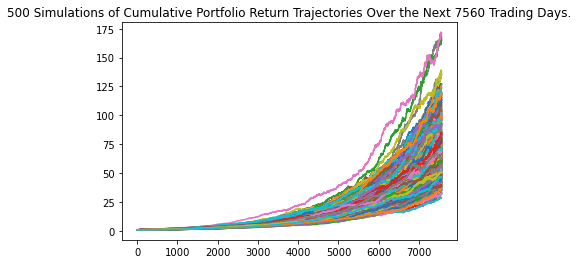

In [20]:
# Plot simulation outcomes
line_plot_portfolio = MC_PORTFOLIO.plot_simulation()

<AxesSubplot:>

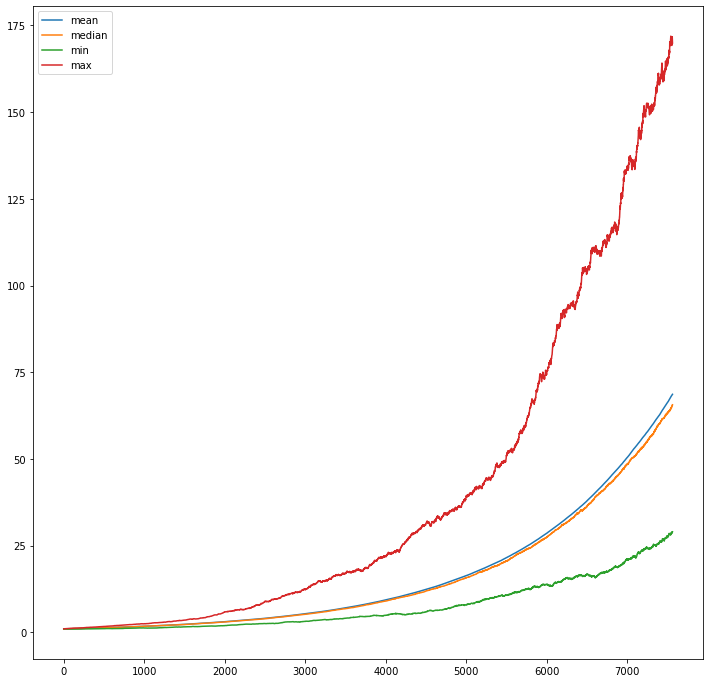

In [21]:
sim_returns.plot(figsize = (12,12))

In [22]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
sim_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000401,1.000507,0.989402,1.011201
2,1.000705,1.000785,0.987249,1.017655
3,1.001276,1.001293,0.982004,1.021567
4,1.001926,1.001643,0.980858,1.022920
...,...,...,...,...
7556,68.492628,65.437456,28.935312,170.883790
7557,68.535395,65.422635,29.004339,171.754142
7558,68.592896,65.370345,29.045475,171.001849
7559,68.608404,65.455543,29.028917,171.248801


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000
cumulative_pnl = initial_investment * sim_returns
cumulative_pnl.head()


,mean,median,min,max
0,20000.000000,20000.000000,20000.000000,20000.000000
1,20008.014482,20010.145599,19788.038547,20224.017756
2,20014.090789,20015.693679,19744.970639,20353.105419
3,20025.529703,20025.850184,19640.075432,20431.337602
4,20038.511547,20032.851095,19617.153302,20458.399319


In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
tbl = MC_PORTFOLIO.summarize_cumulative_return()
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $360023.78 and $1184145.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $360023.78 and $1184145.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [32]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")